In [1]:
import numpy as np
import pandas as pd
#from pylab import imshow, show, savefig
from pylab import *
import mahotas
import mahotas.demos
from PIL import Image, ImageOps
import requests
from io import BytesIO
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
img = Image.open("2016.03.Jun.pdf-6.jpg")
img = ImageOps.invert(img)
img = img.convert('1')
x = np.asarray(img)
np.shape(x)

(2550, 1650)

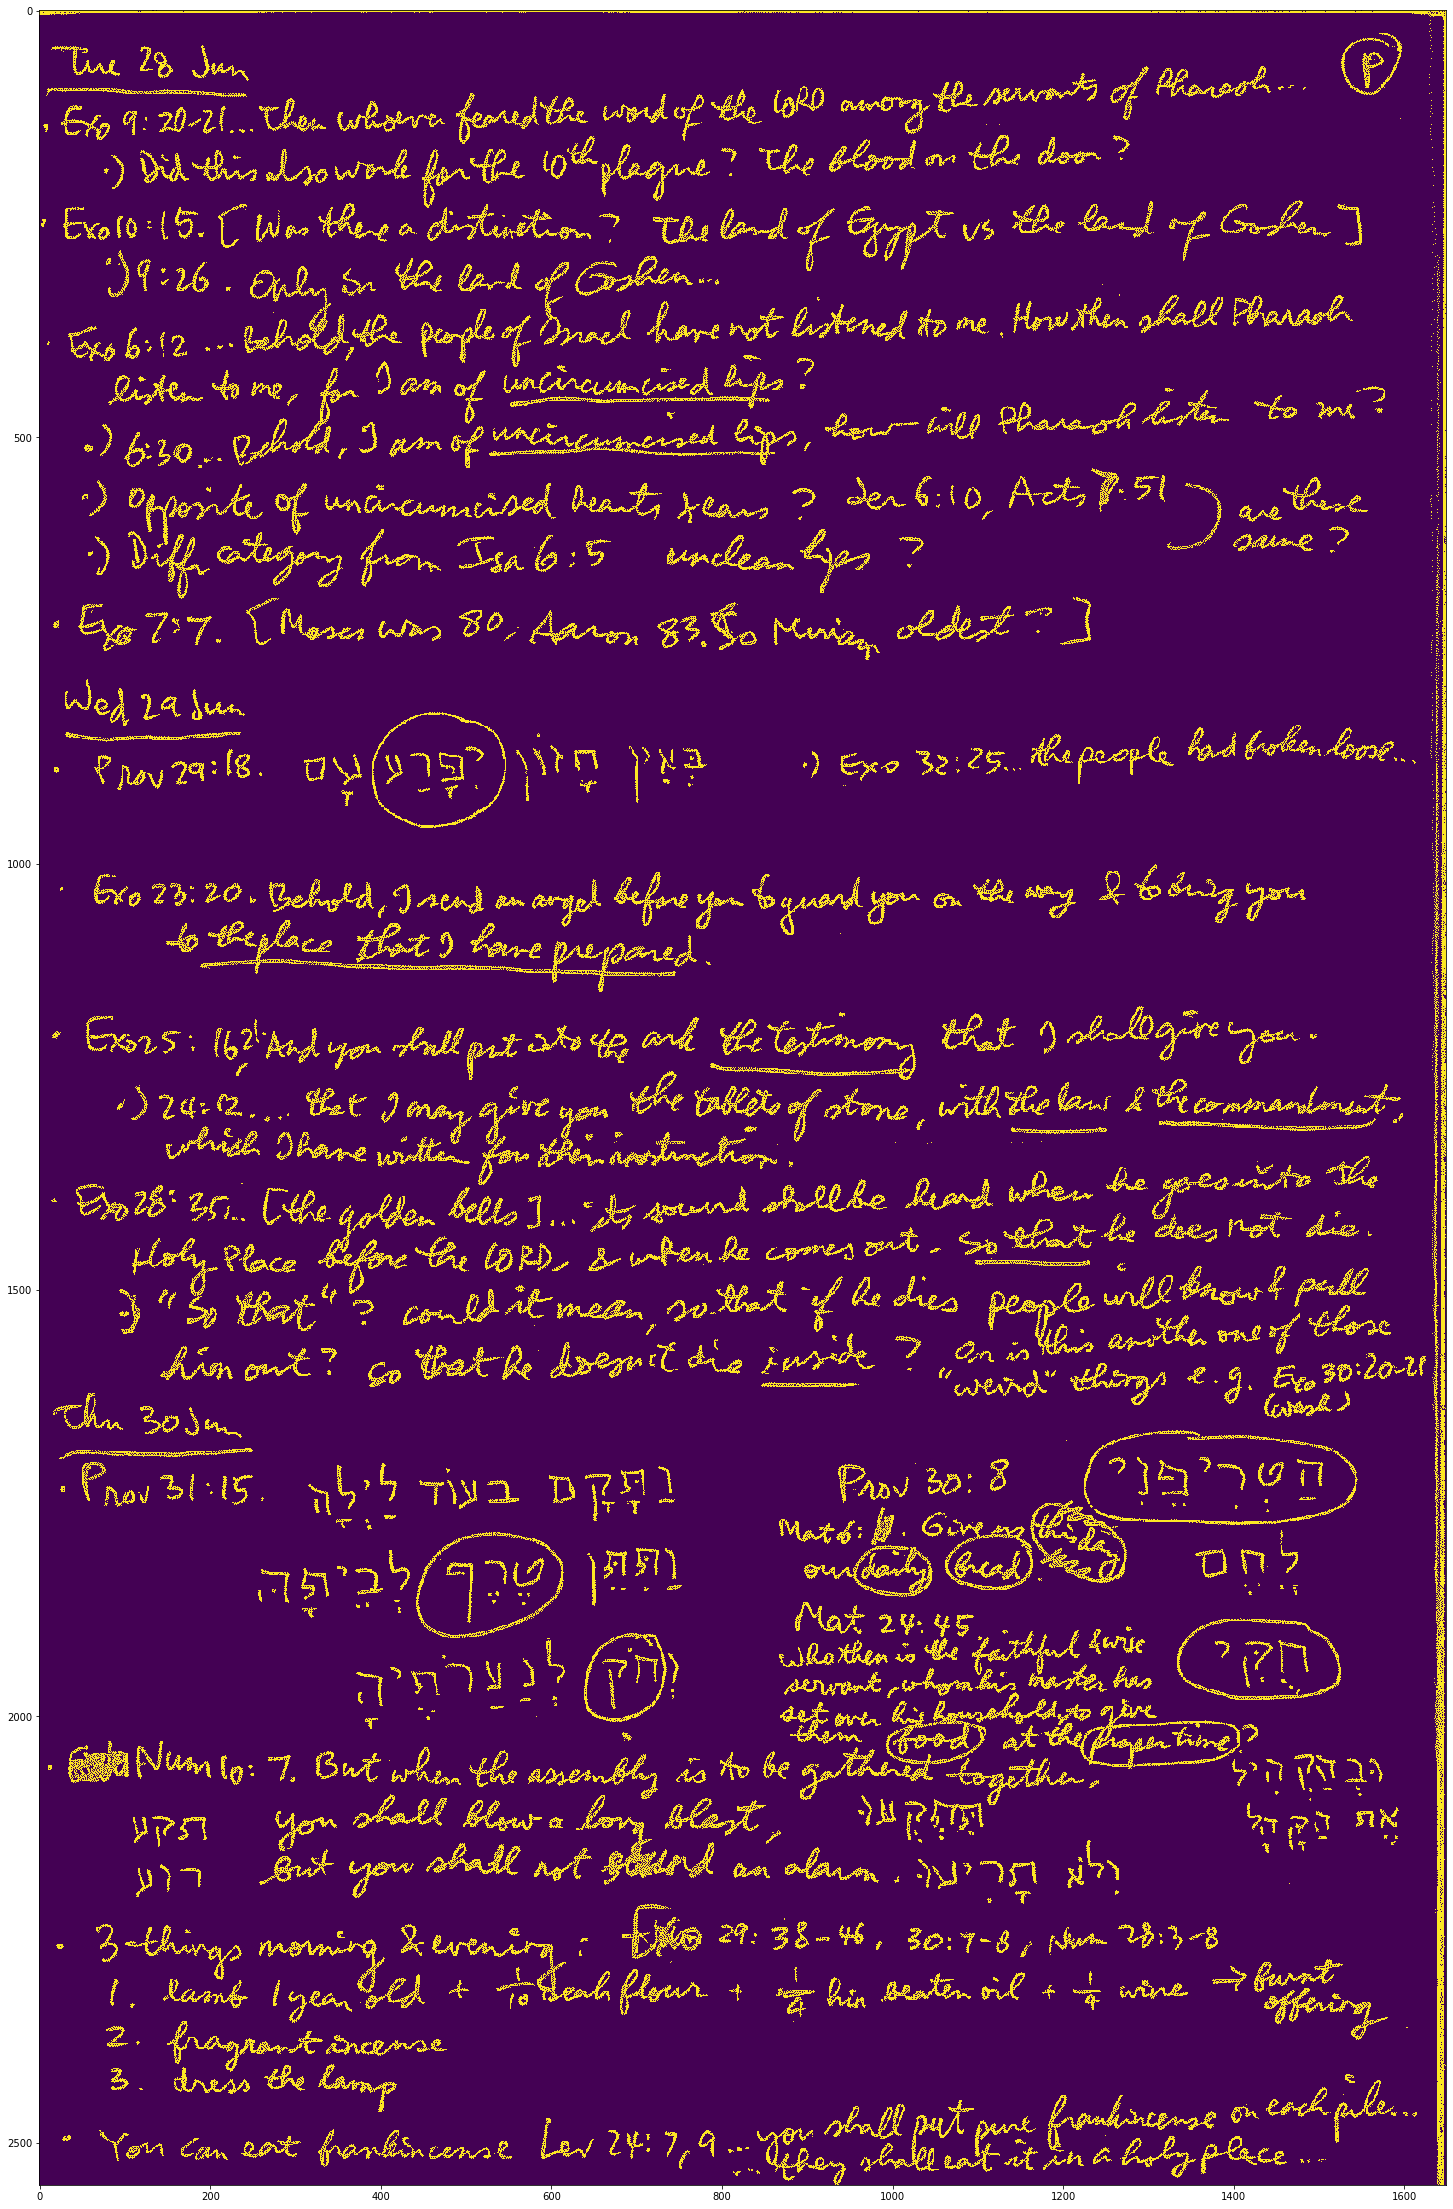

In [3]:
fig = plt.figure(figsize=(40,40))
imshow(x)
show()

In [4]:
w = x.astype(float)
print(np.shape(w))
print(w[120:148, 116:132])

(2550, 1650)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1

In [5]:
z = x[238:266, 121:137].astype(float)
print(z)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

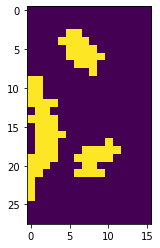

(28, 16)


In [6]:
#y = x[120:148, 116:132] # Exo 9:20
#y = x[238:266, 121:137] # Exo 10:15
#y = x[300:328, 140:156] # 9:26
#y = x[380:408, 120:136] # Exo 6:12
y = x[505:533, 120:136] # 6:30
#y = x[561:589, 1046:1062] # Jer 6:10
#y = x[556:584, 1262:1278] # Acts 7:51
#y = x[630:658, 617:633] # Isa 6:5
#y = x[708:736, 152:168] # Exo 7:7
#y = x[875:903, 197:213] # Prov 29:18
#y = x[871:899, 1069:1085] # Exo 32:25
#y = x[1022:1050, 173:189] # Exo 23:20
#y = x[1197:1225, 171:187] # Exo 25:16,21
#y = x[1275:1303, 186:202] # 24:12
#y = x[1377:1405, 149:165] # Exo 28:35
### 26,16 y = x[1580:1608, 1539:1555] # Exo 30:20-21
#y = x[1720:1748, 192:208] # Prov 31:15
#y = x[1714:1742, 1083:1099] # Prov 30:8
#y = x[1882:1910, 1027:1043] # Mat 24:45
#y = x[2051:2079, 241:257] # Num 10:7
#y = x[2247:2275, 831:847] # Exo 29:38-46
#y = x[2253:2281, 1060:1076] # 30:7-8
#y = x[2246:2274, 1308:1324] # Num 28:3-8
#y = x[2486:2514, 708:724] # Lev 24:7,9
imshow(y)
show()
print(np.shape(y))

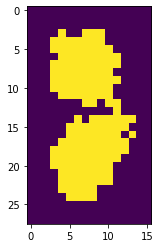

(28, 16)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1.

In [7]:
y = x[120:148, 116:132] | \
    x[238:266, 121:137] | \
    x[300:328, 140:156] | \
    x[380:408, 120:136] | \
    x[561:589, 1046:1062] | \
    x[556:584, 1262:1278] | \
    x[630:658, 617:633] | \
    x[708:736, 152:168] | \
    x[875:903, 197:213] | \
    x[871:899, 1069:1085] | \
    x[1022:1050, 173:189] | \
    x[1197:1225, 171:187] | \
    x[1275:1303, 186:202] | \
    x[1377:1405, 149:165] | \
    x[1720:1748, 192:208] | \
    x[1714:1742, 1083:1099] | \
    x[1882:1910, 1027:1043] | \
    x[2051:2079, 241:257] | \
    x[2247:2275, 831:847] | \
    x[2253:2281, 1060:1076] | \
    x[2246:2274, 1308:1324] | \
    x[2486:2514, 708:724]

imshow(y)
show()
print(np.shape(y))
print(y.astype(float))

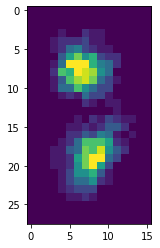

(28, 16)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  2.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  2.  2.  3.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  5.  6.  3.  2.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  8. 11.  7.  9.  3.  2.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  5. 14. 14. 14.  9.  6.  5.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  2. 10.  9. 14. 13. 12.  7.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  4. 10. 12. 13. 11.  5.  3.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  5.  5. 10.  7.  5.  3.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  2.  1.  5.  3.  3.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  1.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  2.  1.  3.  2.  1.

In [8]:
y = w[120:148, 116:132] + \
    w[238:266, 121:137] + \
    w[300:328, 140:156] + \
    w[380:408, 120:136] + \
    w[561:589, 1046:1062] + \
    w[556:584, 1262:1278] + \
    w[630:658, 617:633] + \
    w[708:736, 152:168] + \
    w[875:903, 197:213] + \
    w[871:899, 1069:1085] + \
    w[1022:1050, 173:189] + \
    w[1197:1225, 171:187] + \
    w[1275:1303, 186:202] + \
    w[1377:1405, 149:165] + \
    w[1720:1748, 192:208] + \
    w[1714:1742, 1083:1099] + \
    w[1882:1910, 1027:1043] + \
    w[2051:2079, 241:257] + \
    w[2247:2275, 831:847] + \
    w[2253:2281, 1060:1076] + \
    w[2246:2274, 1308:1324] + \
    w[2486:2514, 708:724]

imshow(y)
show()
print(np.shape(y))
print(y.astype(float))

In [9]:
# Make pattern of colon.
colon = np.ones((28, 16))*-1
colon[3:12,2:14] = 0
colon[16:25,2:14] = 0
colon[5:10,5:11] = 1
colon[18:23,5:11] = 1
colon[6:9,6:10] = 2
colon[19:22,6:10] = 2
print(colon)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.]
 [-1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.]
 [-1. -1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0. -1. -1.]
 [-1. -1.  0.  0.  0.  1.  2.  2.  2.  2.  1.  0.  0.  0. -1. -1.]
 [-1. -1.  0.  0.  0.  1.  2.  2.  2.  2.  1.  0.  0.  0. -1. -1.]
 [-1. -1.  0.  0.  0.  1.  2.  2.  2.  2.  1.  0.  0.  0. -1. -1.]
 [-1. -1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0. -1. -1.]
 [-1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.]
 [-1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. 

In [10]:
# Make pattern of dot.
dot = np.ones((14, 16))*-1
dot[5:9,4:12] = 0
dot[6:8,6:10] = 1
print(dot)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  0.  0.  1.  1.  1.  1.  0.  0. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  0.  0.  1.  1.  1.  1.  0.  0. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


In [10]:
# Convolve with the pattern.
v = mahotas.convolve(z, colon)
print(z)
print(sorted(v.flatten(), reverse=True)[:9])
print(pd.DataFrame(v))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [22]:
# Convolve with the pattern.
v = mahotas.convolve(w, dot)
print(sorted(v.flatten(), reverse=True)[:9])

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]


In [11]:
# Get the region of the max response.
mask = (v == v.max())
#mask = (v >= 10)
print(np.unique(mask, return_counts=True))

# Dilate the region.
mask = mahotas.dilate(mask, np.ones((60,60)))
print(np.unique(mask, return_counts=True))

(array([False,  True]), array([447,   1]))
(array([ True]), array([448]))


In [43]:
# Tone down everything else.
waldo = x.astype(float)
waldo -= .5 * waldo * ~mask
waldo = np.uint8(waldo)
np.shape(waldo)

ValueError: operands could not be broadcast together with shapes (2550,1650) (28,16) 

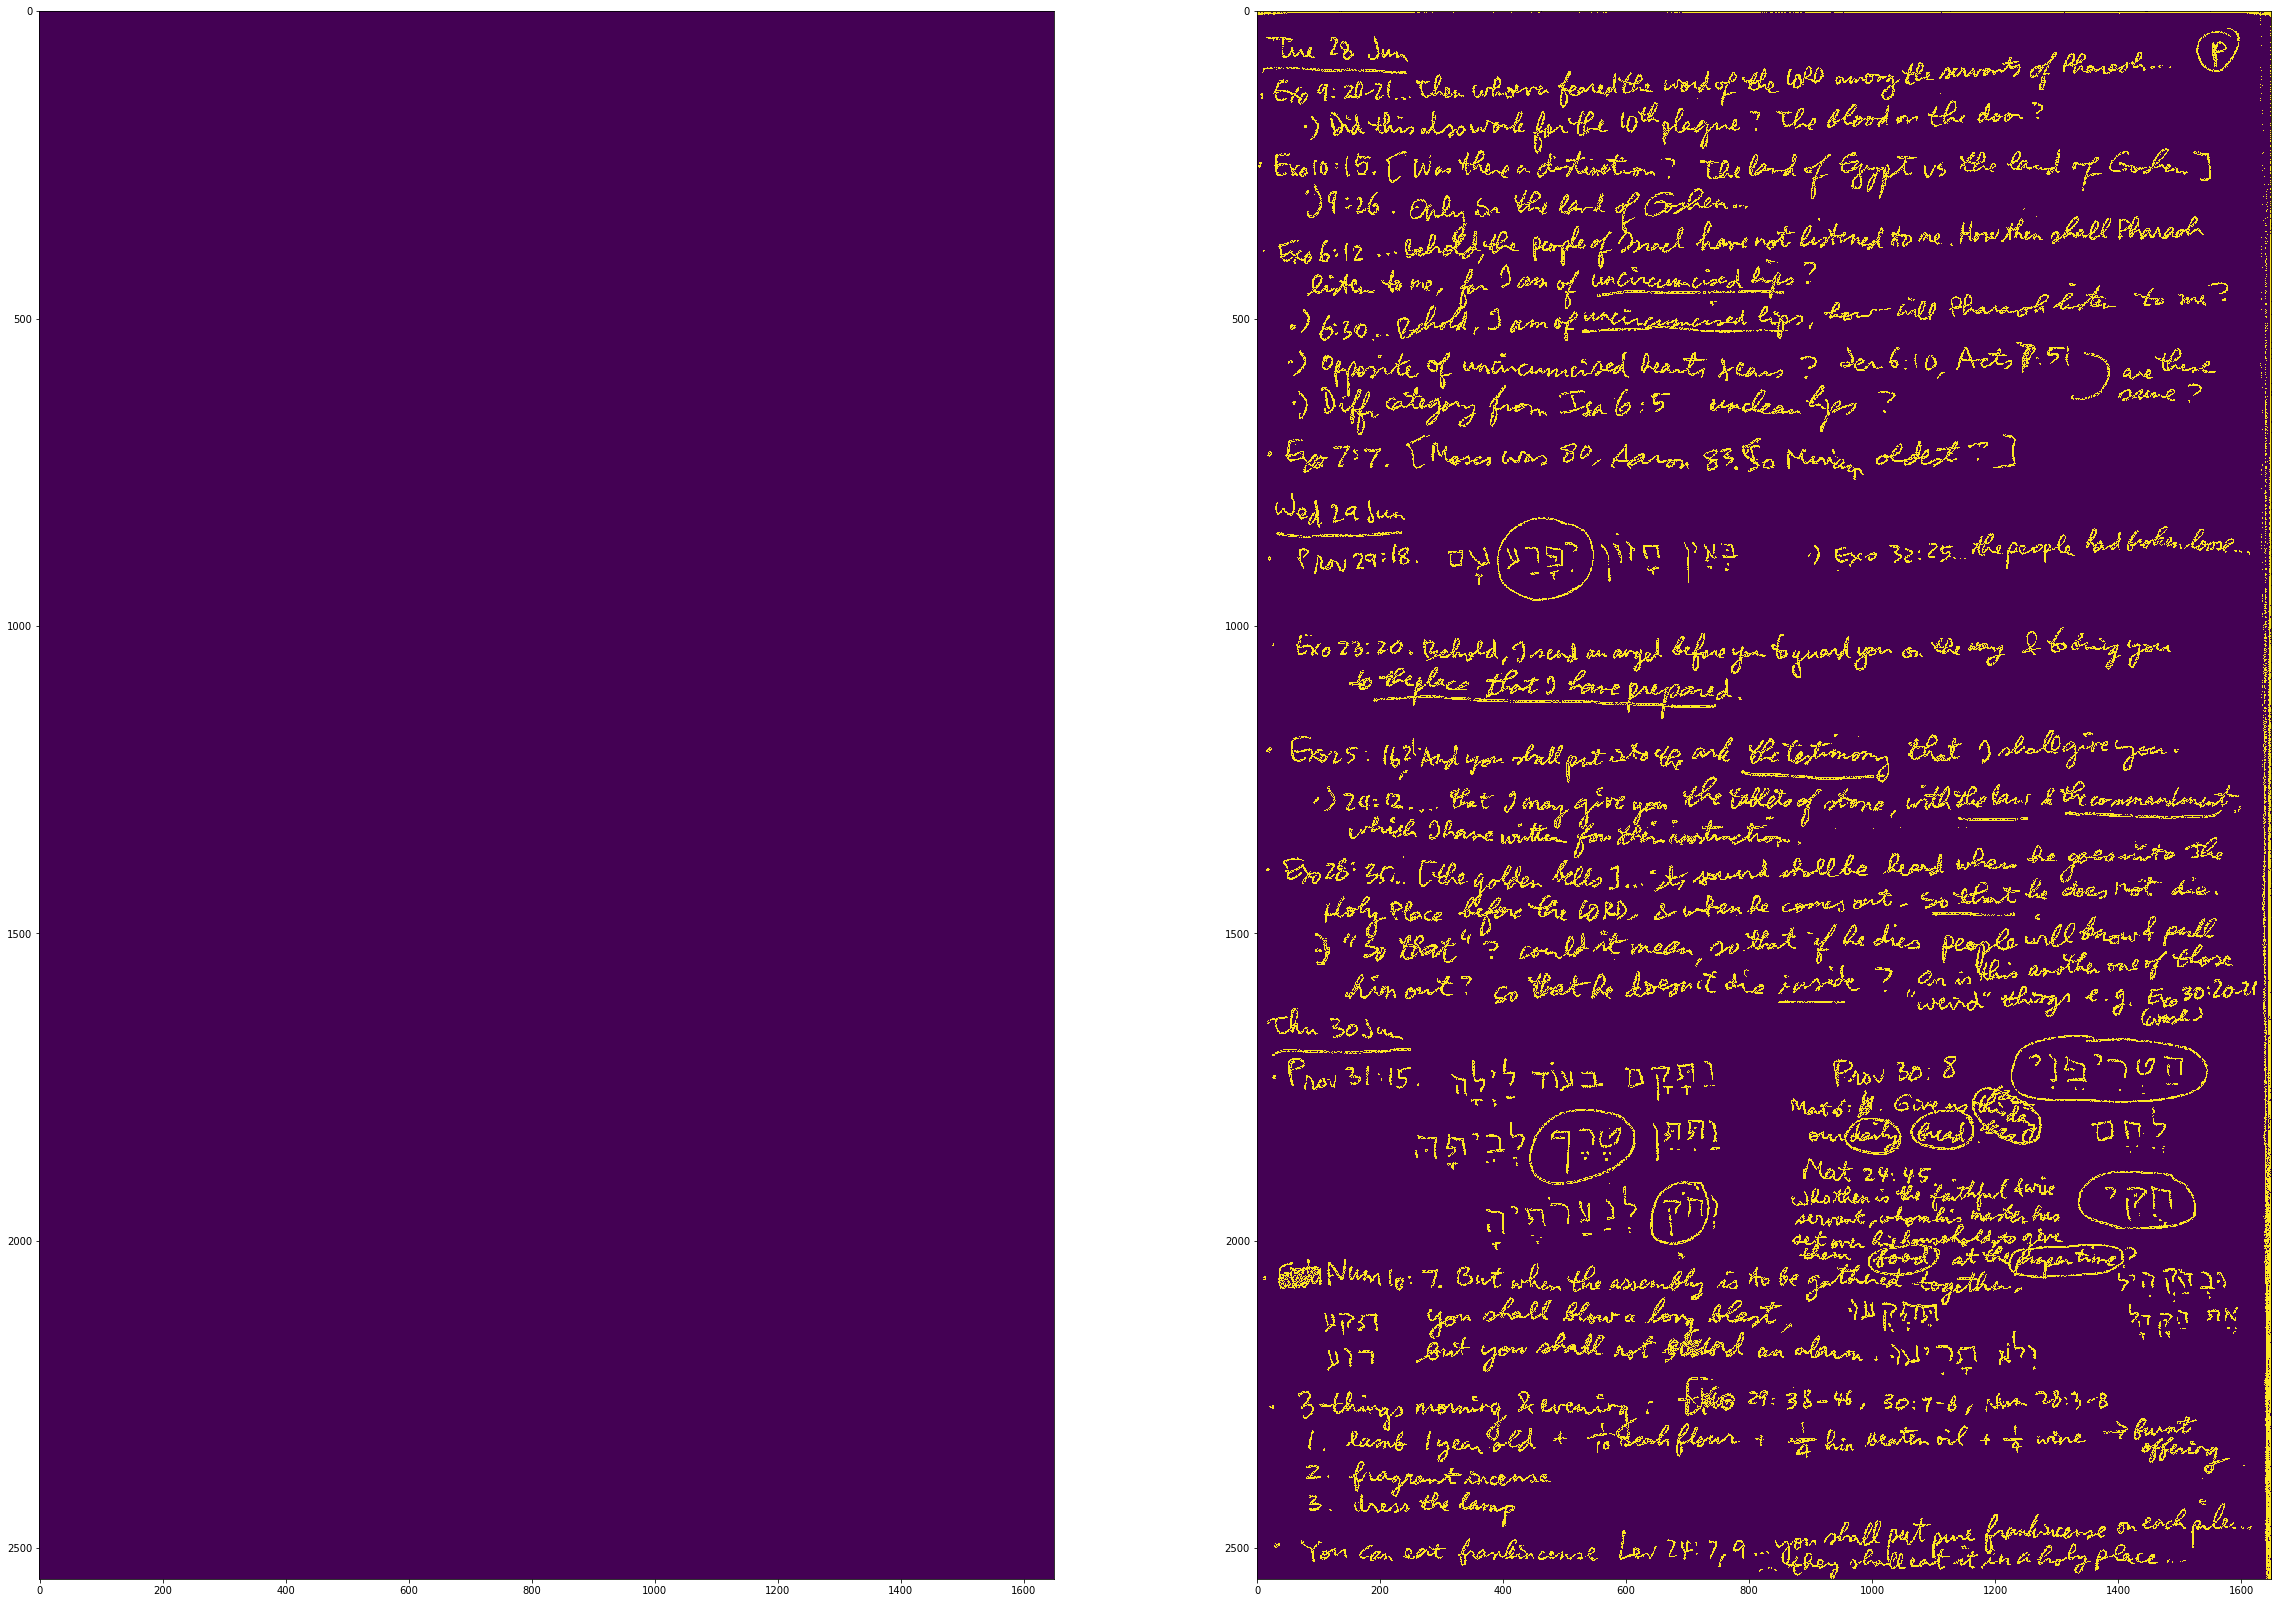

In [23]:
fig = plt.figure(figsize=(40,40))
f, g = fig.subplots(1,2)

f.imshow(waldo)
g.imshow(x)
show()